# Exploratory Data Analysis

The exploratory data analysis (EDA) of the AI4I 2020 Predictive Maintenance dataset aims to understand the factors associated with industrial machine failures. This dataset includes operational measurements (temperatures, rotation speed, torque, wear), product information, and several binary indicators describing different types of failures. The objective of this exploration is to identify trends, relationships between variables, and early warning signs of failure in order to effectively prepare for the predictive modelling phase. This step also makes it possible to verify the internal consistency of the dataset, assess data quality, and identify the most relevant variables for the rest of the pipeline.

In [11]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
print("Libraries imported successfully.")

Libraries imported successfully.


## 1-Overview of the data set

In [12]:
#Import the data set
data=pd.read_csv(r"C:\Users\Yves-Ricky\Desktop\predictive_maintenance_MLOPS\data\raw\ai4i2020.csv")
df=data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [13]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [14]:
#Shape of the data set
print(f"Our data set has {df.shape[0]} rows and {df.shape[1]} columns")

Our data set has 10000 rows and 14 columns


In [15]:
#General statistics
df.describe(include= "all")

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


### a-Data cleaning

In [16]:
#Checking for duplicates
duplicates=df.duplicated().sum()
print(duplicates)

0


We do not have any duplicated values in our data set

In [17]:
#Checking for missing values
missings= df.isnull().sum()
missing_percentage=df.isnull().sum()/len(df)
missing_table=pd.DataFrame({
    "Count":missings,
    "Percentage (%)": missing_percentage
})
missing_table=missing_table.sort_values(by="Percentage (%)", ascending=False)
print(missing_table)

                         Count  Percentage (%)
UDI                          0             0.0
Product ID                   0             0.0
Type                         0             0.0
Air temperature [K]          0             0.0
Process temperature [K]      0             0.0
Rotational speed [rpm]       0             0.0
Torque [Nm]                  0             0.0
Tool wear [min]              0             0.0
Machine failure              0             0.0
TWF                          0             0.0
HDF                          0             0.0
PWF                          0             0.0
OSF                          0             0.0
RNF                          0             0.0


We did not have any missing rows in our data set

In [22]:
#Checking for outliers using the Interquartile method
numcols=[col for col in df.select_dtypes(include="number").columns if not col.lower().startswith("udi") ]
for col in numcols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")

Number of outliers in Air temperature [K]: 0
Number of outliers in Process temperature [K]: 0
Number of outliers in Rotational speed [rpm]: 418
Number of outliers in Torque [Nm]: 69
Number of outliers in Tool wear [min]: 0
Number of outliers in Machine failure: 339
Number of outliers in TWF: 46
Number of outliers in HDF: 115
Number of outliers in PWF: 95
Number of outliers in OSF: 98
Number of outliers in RNF: 19


Certain variables such as Rotational speed and Torque show extreme values according to the IQR method. Upon inspection, these values correspond to actual machine behaviour and should not be deleted.

## b-Exploratory analysis

### i-Analysis of the target variable "Machine failure"

In [28]:
#Count and ratio of the failure 
count=df['Machine failure'].value_counts()
ratio=df['Machine failure'].value_counts(normalize=True).round(3)*100
print (count)
print (ratio)

Machine failure
0    9661
1     339
Name: count, dtype: int64
Machine failure
0    96.6
1     3.4
Name: proportion, dtype: float64


We can see that we just have 339 failures. This indicate a very imbalanced dataset with 3.4 percent of failures

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\146498120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Machine failure', palette='viridis')


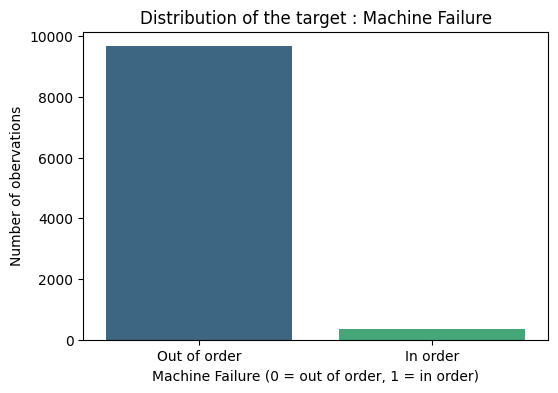

In [ ]:
#Distribution of the "machine failure" column with a countplot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Machine failure', palette='viridis')
plt.title("Distribution of the target : Machine Failure")
plt.xlabel("Machine Failure (0 = out of order, 1 = in order)") 
plt.ylabel("Number of obervations") 
plt.xticks([0,1], ["Out of order", "In order"]) 
plt.show()

### ii-Univariate analysis

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


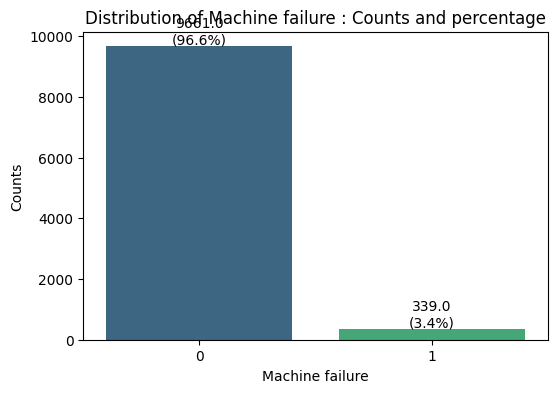

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


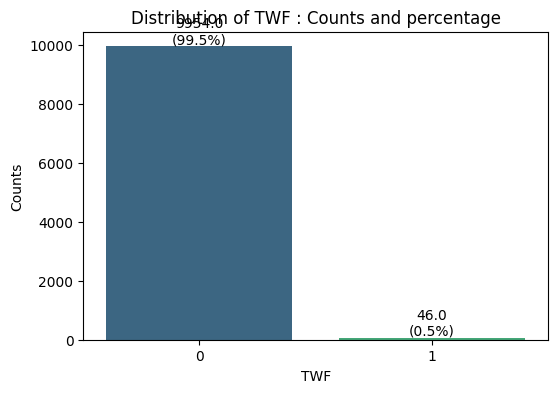

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


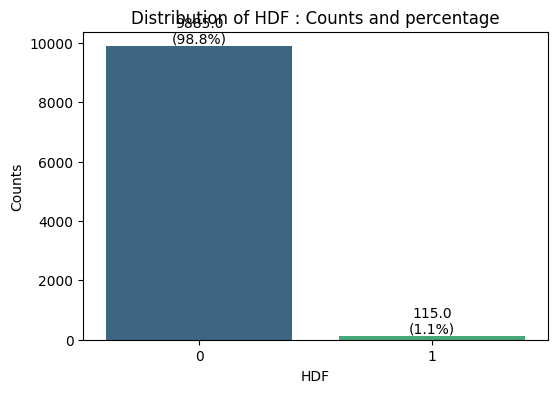

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


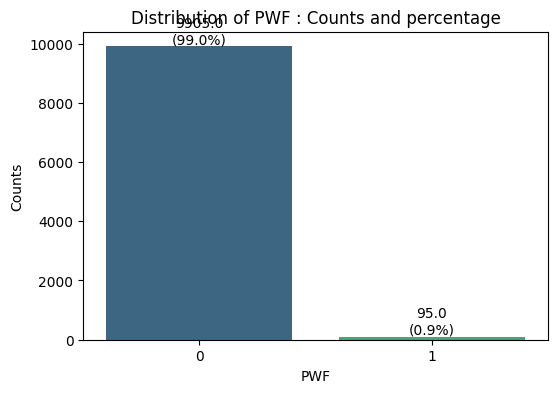

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


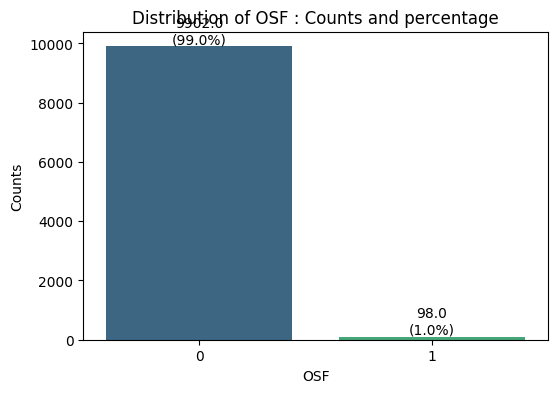

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\2264433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette='viridis')


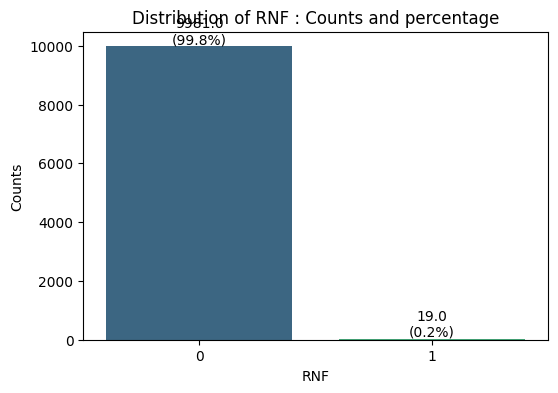

In [33]:

# Identify and plot binary columns with count plot
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

total = len(df)

for col in binary_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(data=df, x=col, palette='viridis')

    # Add counts and percentages
    for p in ax.patches:
        count = p.get_height()
        pct = 100 * count / total
        label = f"{count}\n({pct:.1f}%)"
        ax.annotate(label,
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

    plt.title(f"Distribution of {col} : Counts and percentage")
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()


In [40]:
#Statistics for continuous variables
from scipy.stats import skew, kurtosis
stats_table=pd.DataFrame({
    "mean": df[num_continuous].mean(),
    "median": df[num_continuous].median(),
    "std":df[num_continuous].std(),
    'min':df[num_continuous].min(),
    "max": df[num_continuous].max(),
    "skewness": df[num_continuous].apply(skew),
    "Kurtosis": df[num_continuous].apply(kurtosis)
}
)

stats_table


,mean,median,std,min,max,skewness,Kurtosis
Air temperature [K],300.00493,300.1,2.000259,295.3,304.5,0.114257,-0.836144
Process temperature [K],310.00556,310.1,1.483734,305.7,313.8,0.015025,-0.500084
Rotational speed [rpm],1538.77610,1503.0,179.284096,1168.0,2886.0,1.992872,7.388649
Torque [Nm],39.98691,40.1,9.968934,3.8,76.6,-0.009515,-0.013834
Tool wear [min],107.95100,108.0,63.654147,0.0,253.0,0.027288,-1.166754


Air temperature [K] and Process temperature [K] show very symmetrical distributions, with averages close to the medians and low dispersion. No asymmetry or significant outliers → stable operating conditions.

Rotational speed [rpm] shows strong right skewness (skew = 1.99) and high kurtosis (7.39), indicating frequent extreme values.
Monitor or transform (log, sqrt) to stabilise the distribution.

Tool wear [min] has a high dispersion (standard deviation = 63.65) but remains broadly symmetrical.

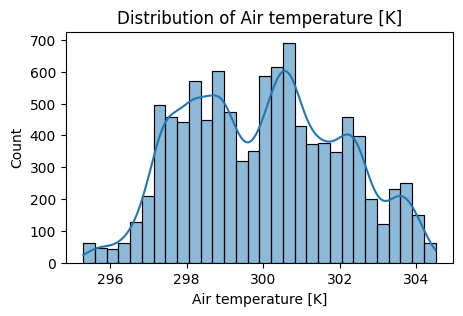

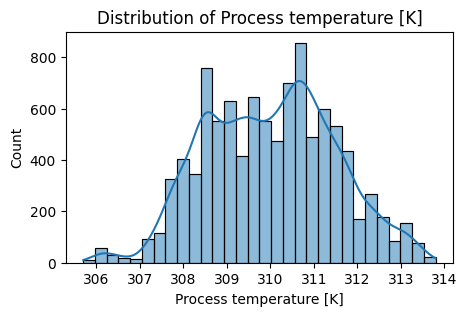

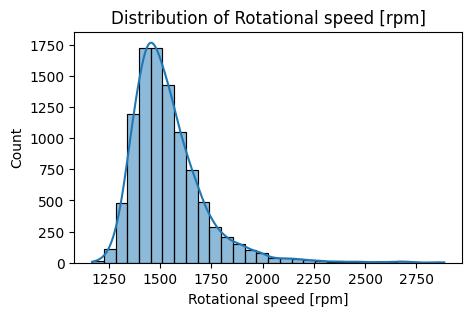

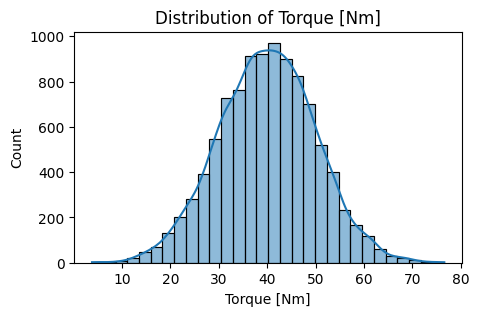

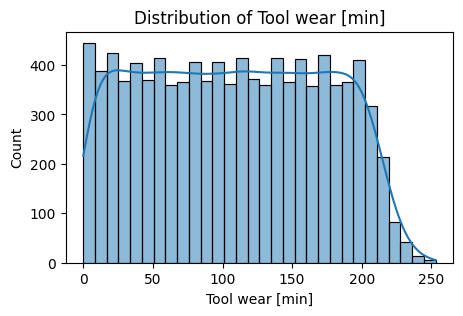

In [38]:
#Histogram for continuous variables
num_continuous=[col for col in df.select_dtypes(include="number").columns if
                df[col].nunique() > 2 ]
#Remove the UDI column
num_continuous.remove("UDI")

for col in num_continuous:  
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins =30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
#For categorical variables, we will first transform the ProductID columns
#  from 1000  unique values into 3
df["Product type"]=df["Product ID"].str[0]
print(df["Product type"].value_counts())
#Assigning the correct data type
df["Product type"]=df["Product type"].astype("category")
#Rename the product type column
df["Product type"]=df["Product type"].map({
    "L": "Low",
    "M":"Medium",
    "H":"High"
}
)
df["Product type"].head()

Product type
L    6000
M    2997
H    1003
Name: count, dtype: int64


0    Medium
1       Low
2       Low
3       Low
4       Low
Name: Product type, dtype: category
Categories (3, object): ['High', 'Low', 'Medium']

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\1893778557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\1893778557.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percentages[i]:.1f}%",


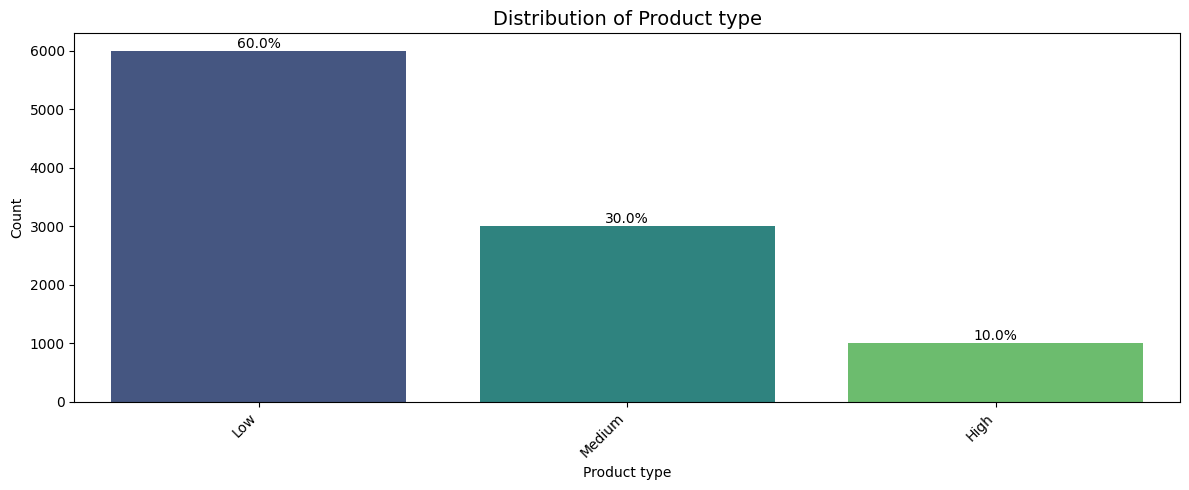

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\1893778557.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_58700\1893778557.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{percentages[i]:.1f}%",


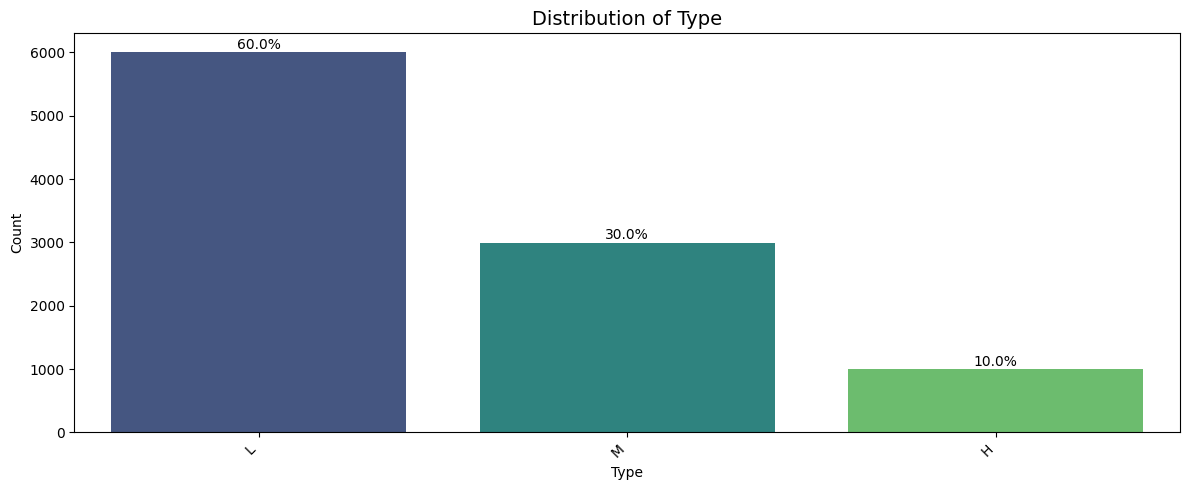

In [49]:
#Countplot for categorical variables
cat_cols=df[["Product type", "Type"]].columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(12,5))

    # Count values
    counts = df[col].value_counts()
    percentages = df[col].value_counts(normalize=True) * 100

    # Plot
    ax = sns.countplot(
        data=df,
        x=col,
        order=counts.index,
        palette="viridis"
    )

    # Add percentages on top of bars
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f"{percentages[i]:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()



## iii-Bivariate analysis

### Numerical features vs "machine failure"

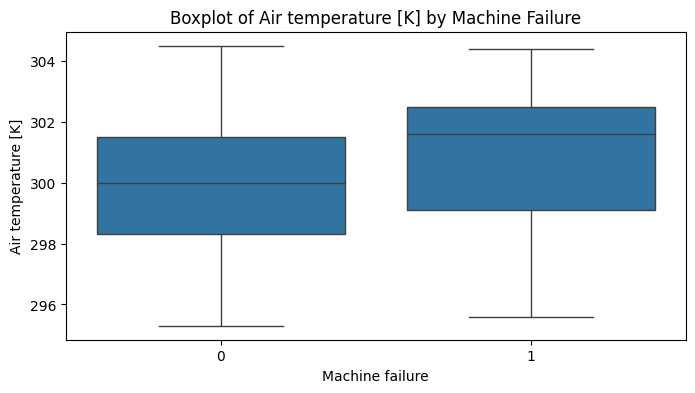

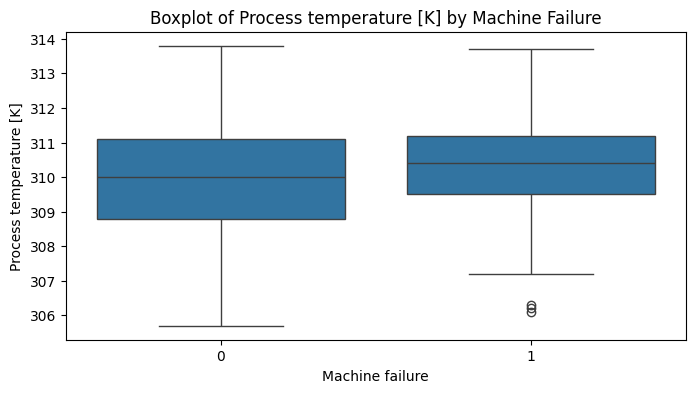

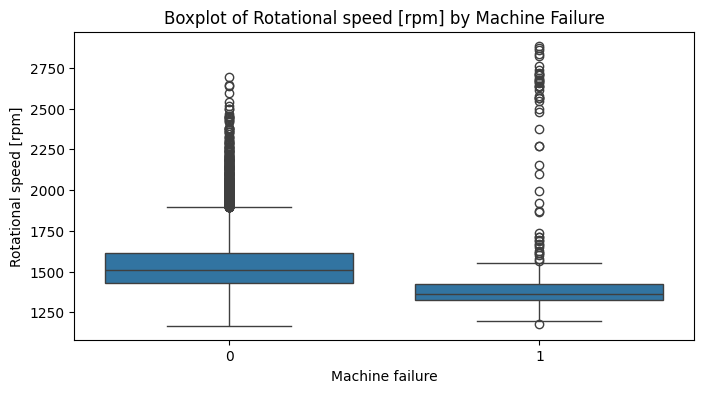

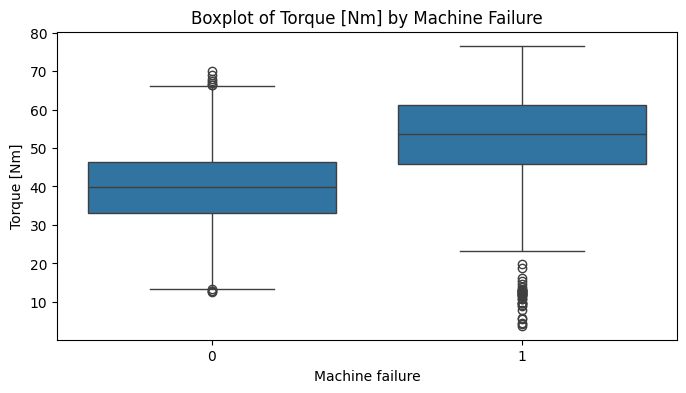

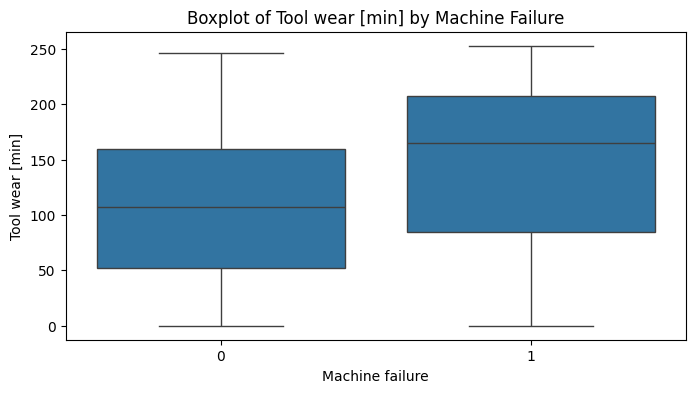

In [ ]:
#Boxplot of continuous numerical features depending the target
for col in num_continuous:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Machine failure", y=col, data=df)
    plt.title(f"Boxplot of {col} by Machine Failure")
    plt.show()


The box plots show that observations associated with failure have higher median values for air temperature, torque, and tool wear. This suggests that hotter thermal conditions, higher mechanical load, and advanced tool wear increase the likelihood of failure. These variables therefore appear to be important candidates for predictive modelling.

#### Bivariate analysis between continuous numerical features

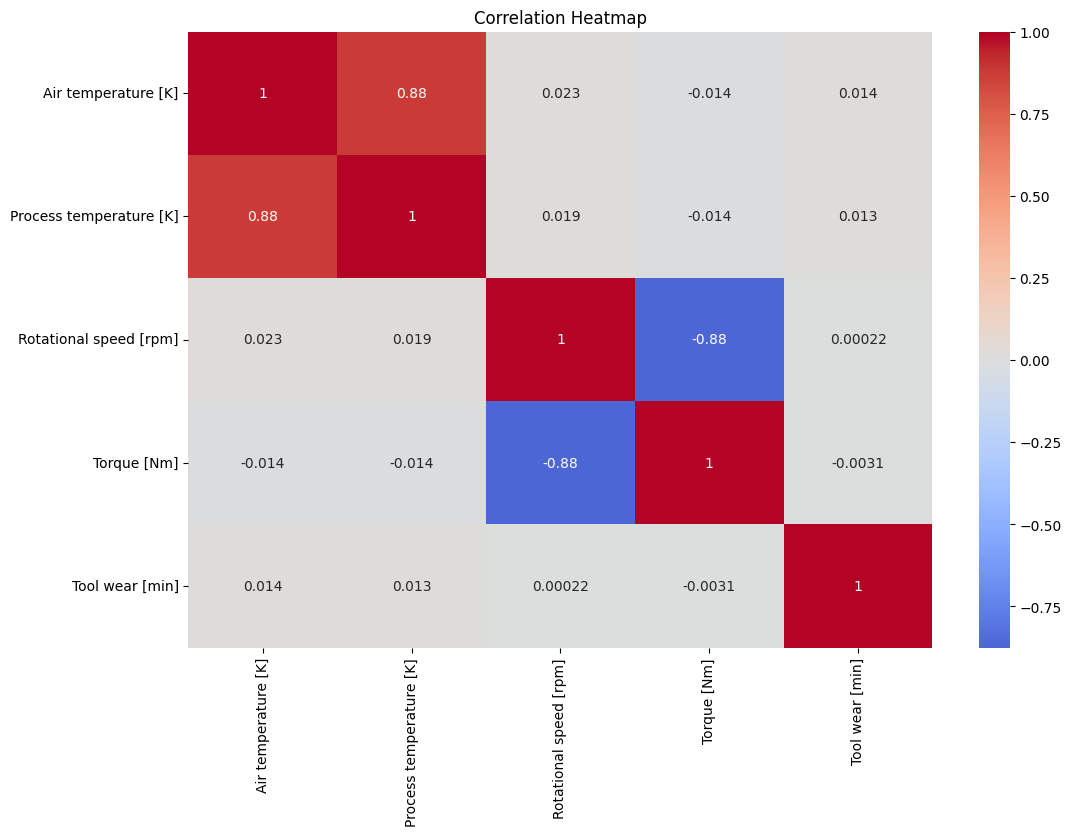

In [51]:
###Heatmap between continuous numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df[num_continuous].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

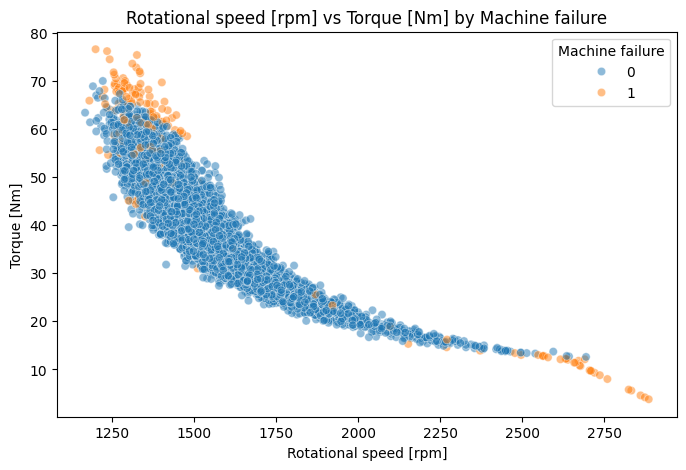

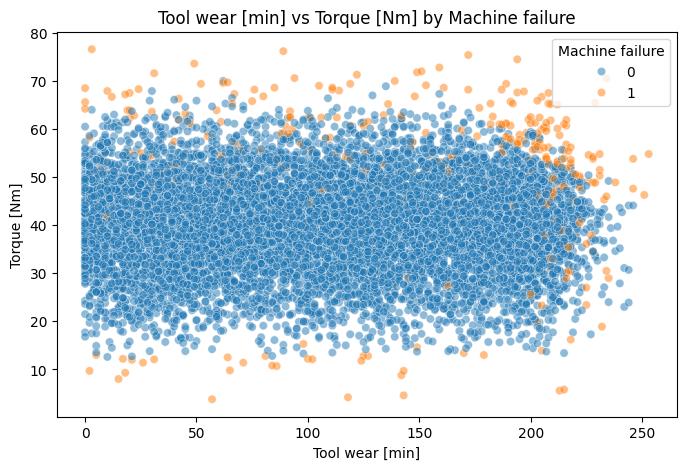

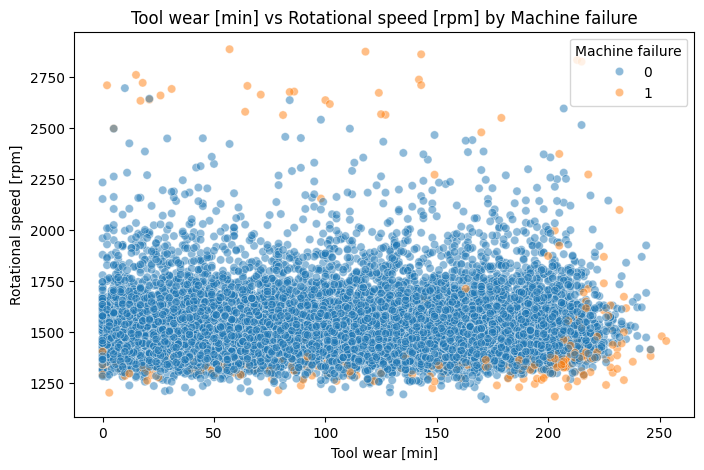

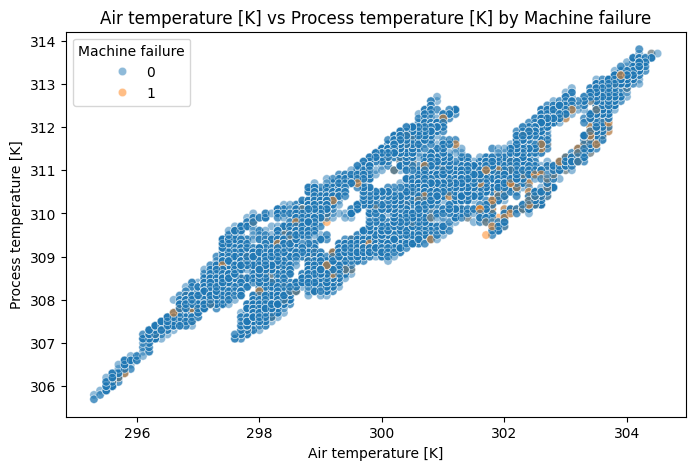

In [55]:
# Scatter plots of numerical columns vs ""
pairs = [
    ("Rotational speed [rpm]", "Torque [Nm]"),
    ("Tool wear [min]", "Torque [Nm]"),
    ("Tool wear [min]", "Rotational speed [rpm]"),
    ("Air temperature [K]", "Process temperature [K]")
]

for x, y in pairs:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=x, y=y, hue="Machine failure", alpha=0.5)
    plt.title(f"{x} vs {y} by Machine failure")
    plt.show()


We have a high positive correlation between "process temperature and "air temperature" (0.88). Machines heat up more easily when the air is warm. The cooling system probably depends on the ambient temperature.The two variables change together. 
Risk of multicolinearity

We also have a high negative correlation between "Torque and "Rotational speed" (-0.88). At high speeds, the engine provides less torque.
At low speeds, it can provide more force (torque).These two variables are highly dependent.They tell the same story from two different angles.

In a linear model, we could keep just one.In a tree model, we can keep both.


#### Binary variables vs. Machine failure

In [57]:
# Contingence table
for col in binary_cols:
    print(f"\n=== Percentage table: {col} vs Machine failure ===")
    print(pd.crosstab(df[col], df["Machine failure"], normalize="columns") * 100)




=== Percentage table: Machine failure vs Machine failure ===
Machine failure      0      1
Machine failure              
0                100.0    0.0
1                  0.0  100.0

=== Percentage table: TWF vs Machine failure ===
Machine failure      0          1
TWF                              
0                100.0  86.430678
1                  0.0  13.569322

=== Percentage table: HDF vs Machine failure ===
Machine failure      0          1
HDF                              
0                100.0  66.076696
1                  0.0  33.923304

=== Percentage table: PWF vs Machine failure ===
Machine failure      0          1
PWF                              
0                100.0  71.976401
1                  0.0  28.023599

=== Percentage table: OSF vs Machine failure ===
Machine failure      0          1
OSF                              
0                100.0  71.091445
1                  0.0  28.908555

=== Percentage table: RNF vs Machine failure ===
Machine failure         

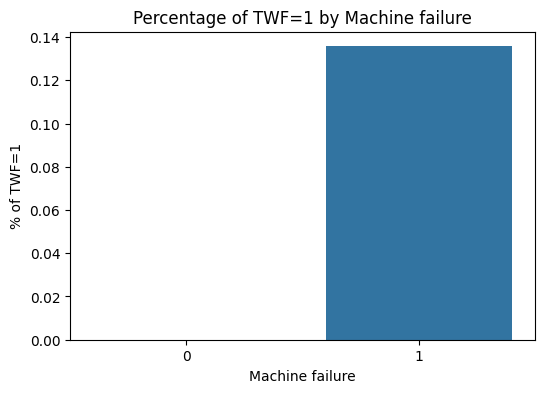

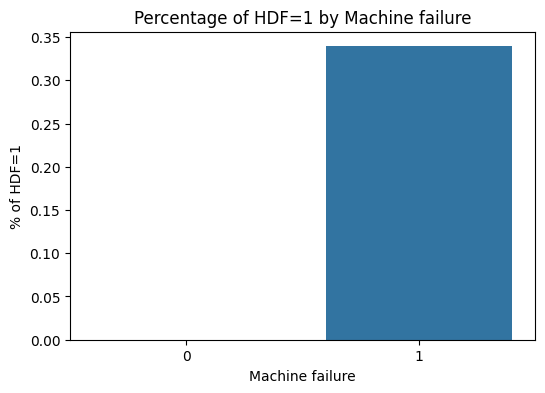

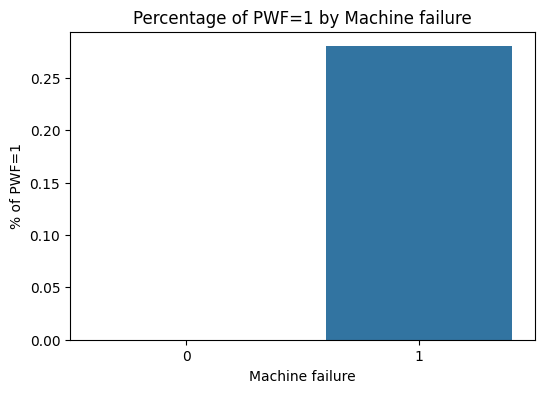

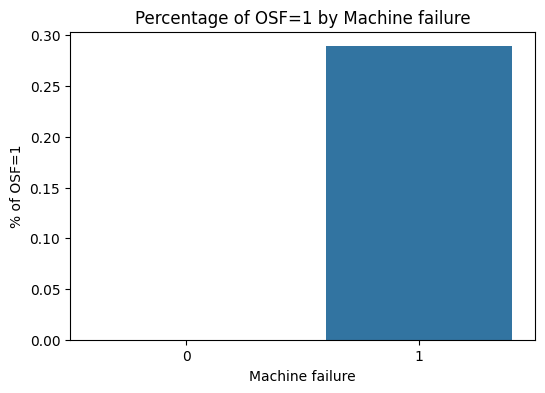

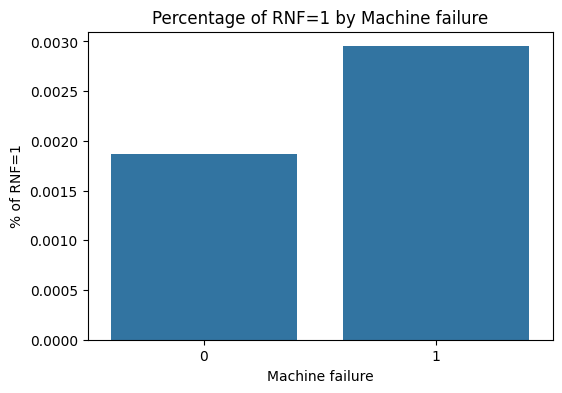

In [ ]:
#Bar plots of subtpes error vs machine error
binary_vars = ["TWF", "HDF", "PWF", "OSF", "RNF"]
for col in binary_vars:
    plt.figure(figsize=(6,4))
    prop = (
        df.groupby("Machine failure")[col]
        .mean()
        .reset_index()
    )
    sns.barplot(data=prop, x="Machine failure", y=col)
    plt.title(f"Percentage of {col}=1 by Machine failure")
    plt.ylabel(f"% of {col}=1")
    plt.show()


The subtypes of breakdowns most commonly associated with machine failures are:"HDF" and "PWF".

In [ ]:
#Chi square test between failure subtypes and machine failure
from scipy.stats import chi2_contingency

for col in binary_vars:
    table = pd.crosstab(df[col], df["Machine failure"])
    chi2, p, dof, expected = chi2_contingency(table)

    print(f"\n=== Chi-square test for {col} ===")
    print(f"Chi2 statistic: {chi2:.3f}")
    print(f"p-value: {p:.5f}")

    if p < 0.05:
        print("➡️ Significant association with Machine failure")
    else:
        print("➡️ No significant association")




=== Chi-square test for TWF ===
Chi2 statistic: 1287.522
p-value: 0.00000
➡️ Significant association with Machine failure

=== Chi-square test for HDF ===
Chi2 statistic: 3285.684
p-value: 0.00000
➡️ Significant association with Machine failure

=== Chi-square test for PWF ===
Chi2 statistic: 2703.626
p-value: 0.00000
➡️ Significant association with Machine failure

=== Chi-square test for OSF ===
Chi2 statistic: 2790.785
p-value: 0.00000
➡️ Significant association with Machine failure

=== Chi-square test for RNF ===
Chi2 statistic: 0.000
p-value: 1.00000
➡️ No significant association


These results indicate that the occurrence of a particular type of failure is not random:
it is strongly linked to the occurrence of an overall machine failure.

More specifically:

    TWF (Tool Wear Failure): significant association

    HDF (Heat Dissipation Failure): strongest association

    PWF (Power Failure): very strong association

    OSF (Overstrain Failure): also very strong association
These results are consistent with industrial logic:
a machine breaks down when at least one of its subsystems fails.
The types of failures therefore represent direct causes of overall failure.


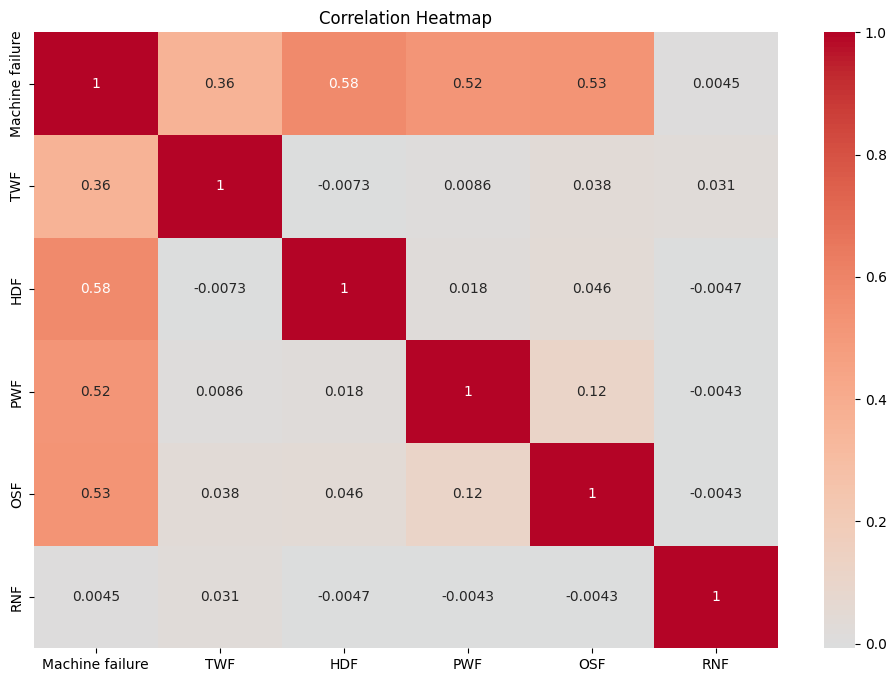

In [ ]:
# Analysis of the relation between failure subtypes
plt.figure(figsize=(12,8))
sns.heatmap(df[binary_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

There is a slight positive correlation between ‘machine failure’ and three types of failures: ‘HDF’ (0.58), “OSF” (0.53), and ‘PWF’ (0.52). This means that they increase the probability of failure.

# Key insights

1. A key initial observation is that the dataset is highly unbalanced: the vast majority of observations correspond to machines operating normally, while breakdowns are clearly in the minority. This imbalance reflects industrial reality — breakdowns are rare — but it requires special attention during modelling.

2. Machines that break down have more extreme operating conditions

The box plots show that when a breakdown occurs, the median values of several continuous variables — notably Air temperature, Torque, and Tool wear — are significantly higher.

3. Failure types are strongly associated with overall failure

Chi-square tests show a statistically highly significant association between the binary variables TWF, HDF, PWF, OSF and the target variable Machine failure.
These sub-failures are direct indicators of overall failure, which validates the structural consistency of the dataset.

4. Binary variables are virtually redundant with the target

As Machine failure is activated as soon as any type of failure occurs, the variables TWF, HDF, PWF, OSF and RNF are very informative but do not constitute true precursor signals.